In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

Cargar dataset desde URL

In [14]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/data.csv"
from sklearn.datasets import load_breast_cancer

In [15]:
def cargar_datos():
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    return df

In [16]:
def preparar_datos(df):
    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [21]:
def entrenar_xgboost(X_train, y_train):
    model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    return model

In [22]:
def evaluar_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}\n")
    print("Reporte de clasificación:\n", report)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()
    
    return acc, cm, report

In [23]:
def pipeline_xgboost():
    df = cargar_datos()
    X_train, X_test, y_train, y_test = preparar_datos(df)
    model = entrenar_xgboost(X_train, y_train)
    acc, cm, report = evaluar_modelo(model, X_test, y_test)
    return model, acc, cm, report

Accuracy: 0.9561

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



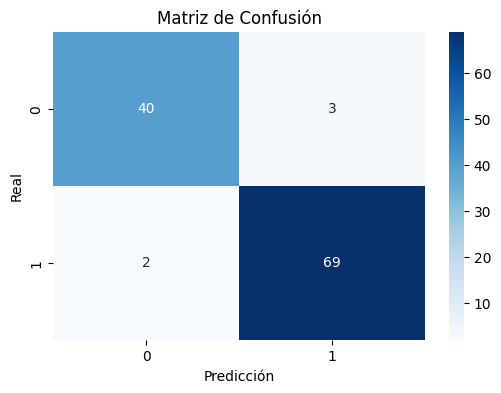

In [24]:
if __name__ == "__main__":
    model, acc, cm, report = pipeline_xgboost()